# **LePHARE statistics**


A notebook to perform statistics on LePHARE results.

# 1. Initialisation

In [14]:
###Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
# %matplotlib widget
%matplotlib inline

###This notebook essentially uses the output catalog from zphota
base_dir = os.path.abspath(os.path.join(os.getcwd(), '..')) #change to your lephare base_dir
CAT_OUT = os.path.join(base_dir, 'simulation_catalogs/star_gal/DESstars_Buzzard_PICKLES_DES_typed.out')

##Transform commented header into header for pandas dataframe
#extract header (line 47 in data file)
with open(CAT_OUT, "r") as f:
    lines = f.readlines()
    header_line = None
    for line in lines:
        if line.startswith("# IDENT  Z_BEST"): #line used for the header, always starts like this
            header_line = line
            break

#add header to column names
if header_line:
    column_names = header_line.strip("#").strip().split()

#displays data
zphota = pd.read_csv(CAT_OUT, sep='\s+', comment="#", header=None, names=column_names) #aphota dataframe
print(len(zphota))
print(list(zphota.columns.values))
zphota

<>:28: SyntaxWarning: invalid escape sequence '\s'
<>:28: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_84436/2713790088.py:28: SyntaxWarning: invalid escape sequence '\s'
  zphota = pd.read_csv(CAT_OUT, sep='\s+', comment="#", header=None, names=column_names) #aphota dataframe


100000
['IDENT', 'Z_BEST', 'Z_MED', 'Z_MODE', 'CHI_BEST', 'MOD_BEST', 'SCALE_BEST', 'NBAND_USED', 'Z_SEC', 'CHI_SEC', 'MOD_STAR', 'CHI_STAR', 'MAG_OBS0', 'MAG_OBS1', 'MAG_OBS2', 'MAG_OBS3', 'MAG_OBS4', 'ERR_MAG_OBS0', 'ERR_MAG_OBS1', 'ERR_MAG_OBS2', 'ERR_MAG_OBS3', 'ERR_MAG_OBS4', 'ZSPEC', 'S_TYPE']


,IDENT,Z_BEST,Z_MED,Z_MODE,CHI_BEST,MOD_BEST,SCALE_BEST,NBAND_USED,Z_SEC,CHI_SEC,...,MAG_OBS2,MAG_OBS3,MAG_OBS4,ERR_MAG_OBS0,ERR_MAG_OBS1,ERR_MAG_OBS2,ERR_MAG_OBS3,ERR_MAG_OBS4,ZSPEC,S_TYPE
0,13525079,0.2842,0.2800,0.2800,1664.100000,91,2.667450,5,-99.9,1.000000e+09,...,17.626,17.598,17.622,0.001,0.001,0.001,0.001,0.003,-99.9,"star,g0v"
1,19197913,0.2824,0.2792,0.2800,3659.650000,91,5.815280,5,-99.9,1.000000e+09,...,16.767,16.735,16.756,0.001,0.001,0.001,0.001,0.003,-99.9,"star,g0v"
2,9325901,0.5407,0.2873,0.5402,1.605810,54,1.317240,4,-99.9,1.000000e+09,...,20.294,20.074,99.000,0.011,0.005,0.005,0.011,99.000,-99.9,"star,k5v"
3,17848488,0.5600,0.5678,0.5600,36.587500,17,3.600330,5,-99.9,1.000000e+09,...,19.660,19.296,19.213,0.014,0.005,0.005,0.005,0.014,-99.9,"star,m2v"
4,22020959,0.1504,0.1500,0.1500,62.061300,97,0.291388,4,-99.9,1.000000e+09,...,18.489,18.533,18.584,0.002,0.002,0.002,0.002,0.008,-99.9,"star,f0i"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,29477335,0.5985,0.6000,0.6000,1557.170000,1,6.923330,5,-99.9,1.000000e+09,...,19.424,18.905,18.762,0.019,0.005,0.005,0.003,0.006,-99.9,"star,m3v"
99996,13924904,0.2165,0.2200,0.2200,135046.000000,1,6.509310,3,-99.9,1.000000e+09,...,16.300,15.908,15.809,0.002,0.001,0.001,0.001,0.001,-99.9,"star,m2v"
99997,8101945,0.5442,0.5446,0.5465,0.702202,69,0.729401,4,-99.9,1.000000e+09,...,20.816,20.663,99.000,0.015,0.007,0.007,0.014,99.000,-99.9,"star,k3iii"
99998,6614261,0.1636,0.1600,0.1600,6445.860000,1,1.930980,3,-99.9,1.000000e+09,...,17.139,16.677,16.574,0.004,0.001,0.001,0.001,0.002,-99.9,"-99,None"


Even though most of the photometric redshifts calculated with lephare approx° match the actual redshift, the z_phot vs z_spec plot clearly shows that many of the calculated redshifts do not. In particular, we can notice error areas on the zz-plot where the lephare redshifts seem to converge. The first step is to identify the sources of error using these areas.

In [15]:
stars = zphota[zphota['S_TYPE'].str.contains('None', case=False, na=False)]
print(len(stars)/len(zphota)*100)

14.704


# Z stats

Since this catalog is only composed of stars, zphota is not suppose to find redshift for this 

/tmp/ipykernel_84436/258840653.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


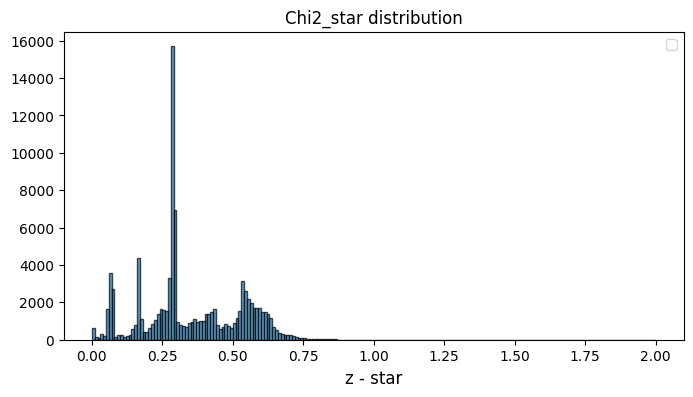

In [16]:
#Plot z hist
plt.figure(figsize=(8, 4))
hist_values = plt.hist(zphota['Z_BEST'], bins=200, alpha=0.7, edgecolor='black', log=False)#, density=True)#, log=True)
plt.title("Chi2_star distribution")

plt.xlabel('z - star', fontsize=12)
# plt.ylim(0,0.010)
plt.legend()
plt.show()

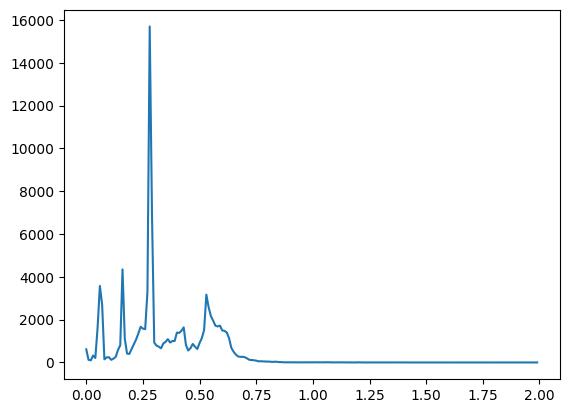

In [17]:
plt.figure()
plt.plot(hist_values[1][:-1], hist_values[0])
plt.show()

What happends at (0.05,0.22,0.65,....) ?

/tmp/ipykernel_84436/3891984830.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


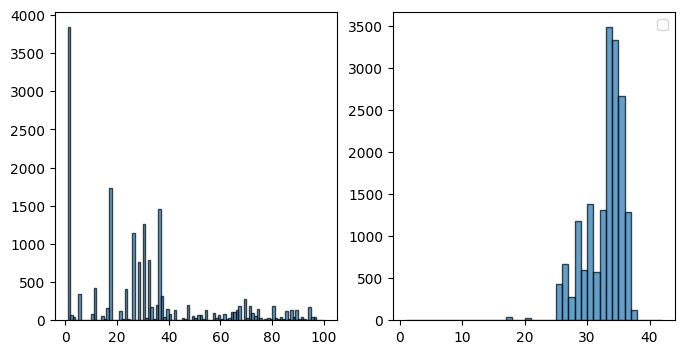

17420
17.419999999999998


In [18]:
# mask = (zphota['Z_BEST']==0.0)
# mask = (zphota['Z_BEST']>0.056) & (zphota['Z_BEST']<0.068)
# mask = (zphota['Z_BEST']>0.076) & (zphota['Z_BEST']<0.08)
# mask = (zphota['Z_BEST']>0.16) & (zphota['Z_BEST']<0.164)
# mask = (zphota['Z_BEST']>0.283) & (zphota['Z_BEST']<0.289)
mask = (zphota['Z_BEST']>0.532) & (zphota['Z_BEST']<0.62)

plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.hist(zphota['MOD_BEST'][mask], bins=range(1,100 + 1, 1), alpha=0.7, edgecolor='black', log=False)#, density=True)#, log=True)

plt.subplot(122)
star_hist = plt.hist(zphota['MOD_STAR'][mask], bins=range(1,42 + 1, 1), alpha=0.7, edgecolor='black', log=False)#, density=True)#, log=True)

plt.legend()
plt.show()

print(len(zphota[mask]))
print(len(zphota[mask])/len(zphota)*100)

In [19]:
zphota['MOD_STAR']

0        21
1        21
2        31
3        34
4        14
         ..
99995    35
99996    34
99997    28
99998    34
99999    28
Name: MOD_STAR, Length: 100000, dtype: int64

# Chi2 stats

First look at the fitting Chi2 computed during zphota run.

/tmp/ipykernel_84436/801554563.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


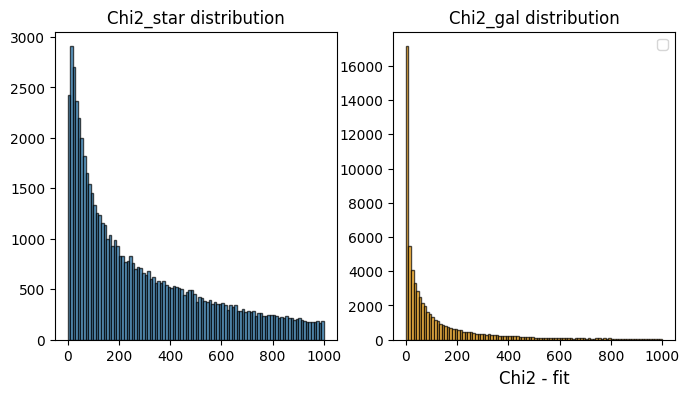

In [20]:
from scipy import stats

mask = (zphota['CHI_STAR']<1000) & (zphota['CHI_BEST']<1000)

#Plot Chi hist
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.hist(zphota['CHI_STAR'][mask], bins=100, alpha=0.7, edgecolor='black')#, density=True)#, log=True)
plt.title("Chi2_star distribution")
plt.subplot(122)
plt.title("Chi2_gal distribution")
plt.hist(zphota['CHI_BEST'][mask], bins=100, alpha=0.7, edgecolor='black', color='orange')#, density=True)#, log=True)
# x = np.linspace(0.1, max(chi_star), 200)

#Chi2
# chi_star_df, chi_star_loc, chi_star_scale = stats.chi.fit(chi_star)
# print(chi_star_df, chi_star_loc, chi_star_scale)
# chi_star_pdf = stats.chi2.pdf(x, chi_star_df, loc=1.5, scale=chi_star_scale)
# plt.plot(x, chi_star_pdf, 'b-')

plt.xlabel('Chi2 - fit', fontsize=12)
# plt.ylim(0,0.010)
plt.legend()
plt.show()

Chi_star as a function of Chi_gal

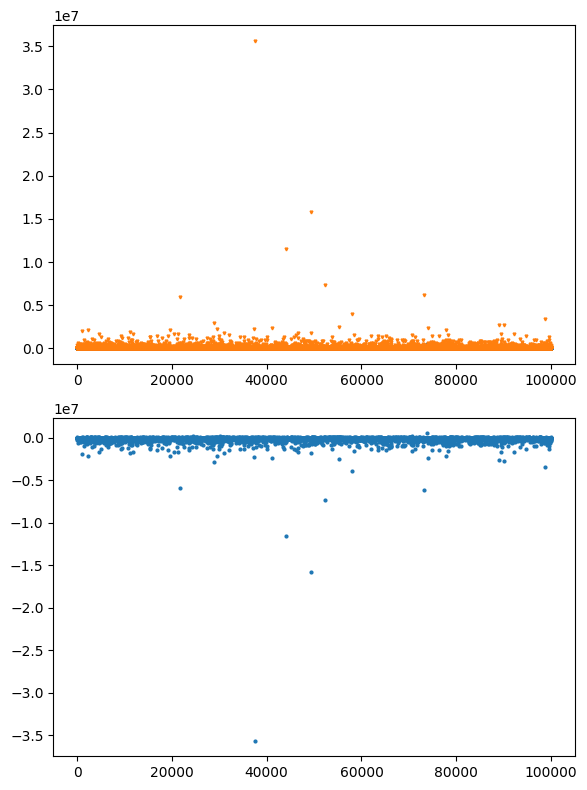

In [21]:
plt.figure(figsize=(6,8), tight_layout=True)
plt.subplot(211)
plt.plot(zphota['CHI_STAR'], markersize=2, marker="o", linestyle='None')
plt.plot(zphota['CHI_BEST'], markersize=2, marker="v", linestyle='None')
plt.subplot(212)

plt.plot(zphota['CHI_STAR']-zphota['CHI_BEST'], markersize=2, marker="o", linestyle='None')

plt.show()

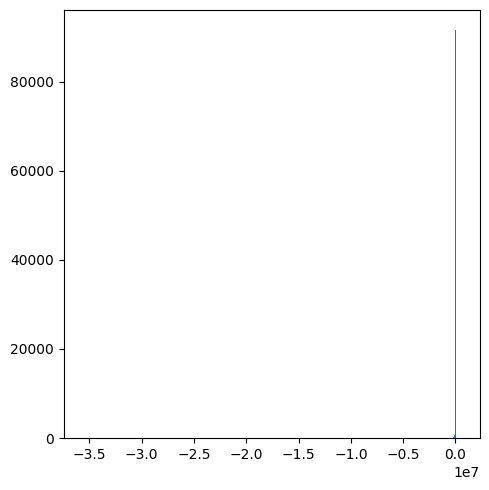

In [22]:
# %matplotlib widget
plt.figure(figsize=(5,5), tight_layout=True)
mask = (zphota['CHI_BEST'] < 1e3) & (zphota['CHI_STAR'] < 1e3)
plt.hist(zphota['CHI_STAR']-zphota['CHI_BEST'], bins=1000)
plt.show()

# MOD_BEST statistics

The goal here is to seek for hypothetical "bad" SED(s) from the mag_gal library that could result into bad fitting results. For different error regions, we compute:

 - SED/redshitf grid VS error_flag and error_mag and relative badredshift/goodredshif
 - 

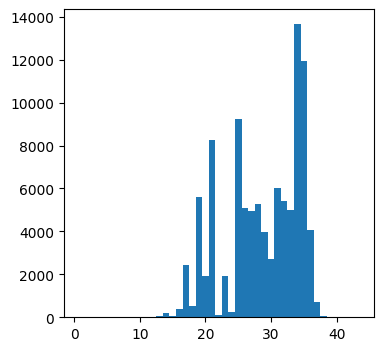

In [23]:
plt.figure(figsize=(4, 4))
# scale best hist
plt.subplot(111)
plt.hist(zphota['MOD_STAR'], range=(0.5,43.5), bins=43, log=False)
# plt.title('Scale_best distribution')
plt.show()

# Saving a particular data set from CAT.out

In [24]:
def masking_input_cat(masked_output_df, original_input_path, new_input_path):
    """
    Filters the INPUT.dat file using the IDENT values from a masked LePhare output DataFrame
    and writes the result to a new file.

    Parameters:
    - masked_output_df: pandas DataFrame with a column named 'IDENT'
    - original_input_path: str, path to the original INPUT.dat file
    - new_input_path: str, path where the filtered INPUT.dat will be saved
    """
    # Load original input file
    input_data = []
    with open(original_input_path, "r") as f:
        for line in f:
            input_data.append(line.strip())

    # Extract IDENTs from masked output
    idents_to_keep = set(masked_output_df["IDENT"].astype(float))
    ident_list=[]
    # Write new input file with only the matching IDENTs
    with open(new_input_path, "w") as f:
        for line in input_data:
            ident = float(line.split()[0])
            if ident in idents_to_keep:
                f.write(line + "\n")
    print(f"Filtered input written to: {new_input_path}")


In [ ]:
# Filter input file based on masked output
INPUT_CAT = '/home/hallouin/Documents/thall_2025/lephare/simulation_catalogs/buzzard_base/Final_Buzzard_training_file.dat'
filtered_INPUT_CAT = '/home/hallouin/Documents/thall_2025/lephare/simulation_catalogs/buzzard_base/zbest175_Buzzard_training_file.dat'
masking_input_cat(zphota175, INPUT_CAT, filtered_INPUT_CAT)
